<a href="https://colab.research.google.com/github/RyanHinshaw/csc442_group_project/blob/main/HW6_Query_Mounir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load dataset
merged_df = pd.read_csv("https://raw.githubusercontent.com/RyanHinshaw/csc442_group_project/refs/heads/main/datasets/merged_player_data.csv")
# Select relevant columns and remove missing values
query_df = merged_df[['player_name', 'POS', 'WNGSPN', 'player_height', 'LPVERT',
                      'reb', 'net_rating', 'gp', 'season']].dropna()
# Filter by minimum games played
filtered_df = query_df[query_df['gp'] >= 40].copy()
# Normalize physical attributes
for col in ['WNGSPN', 'player_height', 'LPVERT']:
    filtered_df[f'{col}_norm'] = (
        filtered_df[col] - filtered_df[col].min()
    ) / (filtered_df[col].max() - filtered_df[col].min())

# Calculate Physical Impact Score
filtered_df['Physical_Impact_Score'] = filtered_df[
    ['WNGSPN_norm', 'player_height_norm', 'LPVERT_norm']
].sum(axis=1)
# Normalize defensive metrics
for col in ['reb', 'net_rating']:
    filtered_df[f'{col}_norm'] = (
        filtered_df[col] - filtered_df[col].min()
    ) / (filtered_df[col].max() - filtered_df[col].min())
# Weighted Defensive Impact Score (70% net rating, 30% rebounds)
filtered_df['Defensive_Impact_Score'] = (
    0.3 * filtered_df['reb_norm'] + 0.7 * filtered_df['net_rating_norm']
)
# Sort players by score
top_defenders = filtered_df.sort_values(by='Defensive_Impact_Score', ascending=False)
# Display Top 5 Defensive Players (with positions)
print("\nTop 5 Defensive Players Overall (Weighted Score: 70% Net Rating, 30% Rebounds):\n")
print(top_defenders[['player_name', 'POS', 'season', 'gp', 'Defensive_Impact_Score',
                     'Physical_Impact_Score', 'reb', 'net_rating', 'WNGSPN',
                     'player_height', 'LPVERT']])



Top 5 Defensive Players Overall (Weighted Score: 70% Net Rating, 30% Rebounds):

           player_name    POS   season  gp  Defensive_Impact_Score  \
272     Draymond Green  PF-SF  2015-16  81                0.884459   
218     DeAndre Jordan      C  2015-16  77                0.807912   
278      Dwight Howard   PF-C  2010-11  78                0.783885   
811        Rudy Gobert      C  2018-19  81                0.727572   
951     Tyson Chandler  SF-PF  2007-08  79                0.720183   
..                 ...    ...      ...  ..                     ...   
83   Brandon Armstrong     SG  2003-04  56                0.089022   
916    Trendon Watford     PF  2021-22  48                0.082527   
725        Nolan Smith     PG  2011-12  44                0.070931   
599      Lazar Hayward  SG-SF  2010-11  42                0.062104   
336     Greg Brown III     PF  2021-22  48                0.061821   

     Physical_Impact_Score   reb  net_rating  WNGSPN  player_height  LPVERT  

Text(0.5, 1.0, 'Distribution of Defensive Impact Score by Position')

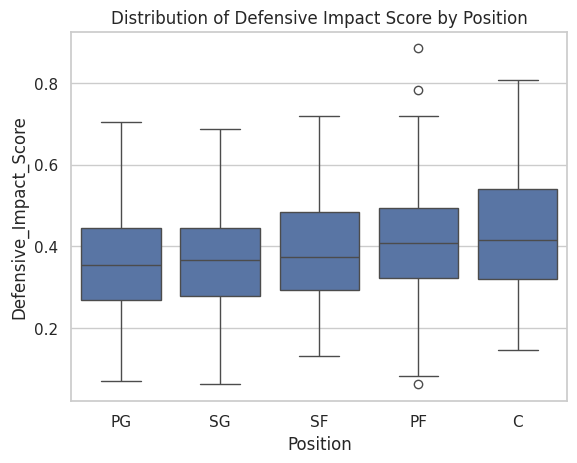

In [ ]:
import seaborn as sns

# Ensure primary position column exists
filtered_df['Position'] = filtered_df['POS'].str.split('-').str[0]

# Boxplot for Defensive Impact Score by Position
sns.set(style="whitegrid")
sns.boxplot(
    data=filtered_df,
    x='Position',
    y='Defensive_Impact_Score',
    order=['PG', 'SG', 'SF', 'PF', 'C']
).set_title('Distribution of Defensive Impact Score by Position')


Text(0.5, 1.0, 'Physical vs. Defensive Impact Score')

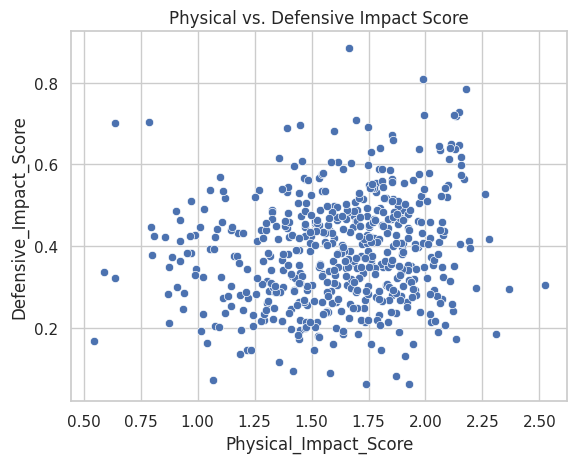

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")
scatter = sns.scatterplot(
    data=filtered_df,
    x='Physical_Impact_Score',
    y='Defensive_Impact_Score'
)
scatter.set_title('Physical vs. Defensive Impact Score')
